In [4]:
import os
import sys
import librosa
import tflearn
import tensorflow as tf
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
%matplotlib inline

In [5]:
os.chdir('C:/Users/karti/Speech/LibriSpeech/dev-clean/')

In [4]:
new_y=[]
f = open("y.txt", "r")
for x in f:
  new_y.append(int(x.strip()))

In [5]:
len(new_y)

2703

In [6]:
new_y = np.array(new_y).reshape(-1,1)

In [7]:
# import pickle
# with open('mfccs.pkl', 'wb') as f:
#     pickle.dump(mfccs, f)

In [8]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(new_y)
# # res=le.transform(new_y)

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_y)
res=enc.transform(new_y).toarray()

In [10]:
res[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [11]:
import pickle
new_mfccs=[]
with open('mfccs.pkl', 'rb') as f:
    new_mfccs = pickle.load(f)

In [12]:
len(new_mfccs)

2703

In [13]:
uni=[]
for i in new_y:
    if(i not in uni):
        uni.append(i)

In [14]:
len(uni)

40

In [15]:
print((new_mfccs[0][0]).mean())

-320.3857


In [16]:
len(new_mfccs)

2703

In [17]:
new_mfccs[200]

array([[-422.61273   , -420.83978   , -421.63156   , ..., -474.38013   ,
        -474.8237    , -455.48975   ],
       [  47.226917  ,   46.655884  ,   49.06836   , ...,   48.494804  ,
          46.773216  ,   48.03399   ],
       [ -28.221333  ,  -29.218151  ,  -22.760973  , ...,    9.897391  ,
           8.224331  ,  -11.62133   ],
       ...,
       [  -6.1200995 ,   -6.310774  ,   -4.5463758 , ...,   -6.9940376 ,
          -5.34544   ,    3.0775084 ],
       [  10.111799  ,   13.743115  ,   21.587517  , ...,    0.93357164,
          -2.2579224 ,   -6.3719716 ],
       [   3.061989  ,    9.477272  ,   14.413259  , ...,   11.6231785 ,
           6.7680616 ,    5.625402  ]], dtype=float32)

In [18]:
new_mfccs_mean=[]

In [19]:
for i in range(len(new_mfccs)):
    mid=[]
    for j in range (len(new_mfccs[i])):
        mid.append(new_mfccs[i][j].mean())
    new_mfccs_mean.append(mid)

In [20]:
len(new_mfccs_mean)

2703

In [21]:
new_mfccs_mean[0]

[-320.3857,
 109.65589,
 2.827534,
 42.29012,
 -28.974195,
 31.407747,
 -23.65616,
 15.919064,
 -13.056216,
 4.2290907,
 -0.3749217,
 1.9312313,
 6.444122]

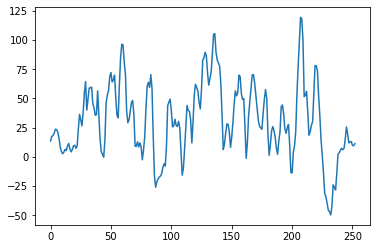

In [22]:
plt.plot([i for i in range (len((new_mfccs[0][5])))], new_mfccs[0][5])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_mfccs_mean, res, test_size=0.33, random_state=42)

In [24]:
net = tflearn.input_data(shape=[None, 13]) #Two wave chunks
net = tflearn.fully_connected(net, 256, activation='relu')
net = tflearn.dropout(net, 0.4)
net = tflearn.fully_connected(net, 128, activation='relu')
net = tflearn.dropout(net, 0.25)
net = tflearn.fully_connected(net, 64, activation='relu')
net = tflearn.dropout(net, 0.2)
net = tflearn.fully_connected(net, len(uni), activation='softmax')
net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [25]:
model = tflearn.DNN(net)

Instructions for updating:
Use tf.cast instead.


In [31]:
model.fit(X_train, y_train, n_epoch=5000, show_metric=True, batch_size=128,snapshot_step=100)

Training Step: 74999  | total loss: 1.50336 | time: 0.042s
| Adam | epoch: 5000 | loss: 1.50336 - acc: 0.5457 -- iter: 1792/1811
Training Step: 75000  | total loss: 1.51681 | time: 0.045s
| Adam | epoch: 5000 | loss: 1.51681 - acc: 0.5427 -- iter: 1811/1811
--


In [32]:
# history =  model.fit(X_train, y_train, n_epoch=1000, show_metric=True, batch_size=128,snapshot_step=100)

In [33]:
#1000

In [34]:
y_pred = model.predict(X_train)

In [35]:
np.sum(np.argmax(y_train, axis=1)==np.argmax(y_pred, axis=1))/len(y_train)

0.8437327443401436

In [36]:
y_pred = model.predict(X_test)

In [37]:
np.sum(np.argmax(y_test, axis=1)==np.argmax(y_pred, axis=1))/len(y_test)

0.7690582959641256

In [207]:
res_mean=np.sum(np.argmax(y_test, axis=1)==np.argmax(y_pred, axis=1))/len(y_test)

In [38]:
# Save a model
model.save('model_mean.tflearn')
# Load a model
# model.load('my_model.tflearn')

INFO:tensorflow:C:\Users\karti\Speech\LibriSpeech\dev-clean\model_mean.tflearn is not in all_model_checkpoint_paths. Manually adding it.


# Reload Saved Model

In [6]:
net = tflearn.input_data(shape=[None, 13]) #Two wave chunks
net = tflearn.fully_connected(net, 256, activation='relu')
net = tflearn.dropout(net, 0.4)
net = tflearn.fully_connected(net, 128, activation='relu')
net = tflearn.dropout(net, 0.25)
net = tflearn.fully_connected(net, 64, activation='relu')
net = tflearn.dropout(net, 0.2)
net = tflearn.fully_connected(net, 40, activation='softmax')
net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')
model = tflearn.DNN(net)
model.load('model_mean.tflearn')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\karti\Speech\LibriSpeech\dev-clean\model_mean.tflearn


In [39]:
model.load('model_mean.tflearn')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\karti\Speech\LibriSpeech\dev-clean\model_mean.tflearn
